# $\alpha$-Rational Inattention

## Attention Elasticity

Considering general symmetric tracking problems



In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from alpha_blahut_arimoto import alpha_BA


In [2]:
sns.set_style('whitegrid')
colors=(sns.color_palette("ch:3,r=.2,l=.6"))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# import os

# cwdir = %pwd
# fig_dir = os.path.abspath(os.path.join(cwdir, '../figures'))

In [3]:
def elast_per_unit(G0, G1, delta, s, a0, a1):
    """
    Numeric Attention Elasticity in state s, 
    between actions a0 and a1.
    """
    dGde = (G1[s, a0]/G1[s, a1] - G0[s, a0]/G0[s, a1])/(2*delta)
    return dGde/G0[s, a0]*G0[s, a1]

In [4]:
def comp_elast(a, diff, delta, s, a0, a1, dim):
    """
    Compute attention elasticity in general symmetric
    tracking problem with 'dim' states/actions.
    """
    # create base payoff
    U_base = np.eye(dim)*diff
    k = 1
    mu = np.ones(dim)/dim
    
    # create change
    change = np.eye(dim)*delta
    U_t1 = U_base + change
    U_t0 = U_base - change
    
    # solve
    alpha_RI = alpha_BA(U_base, k, mu, a)
    qa, la, aP0 = alpha_RI.opt_strat(tol=1e-15)
    # --
    alpha_RI_t1 = alpha_BA(U_t1, k, mu, a)
    qa_t1, la_t1, aP_t1 = alpha_RI_t1.opt_strat(tol=1e-15)
    # --
    alpha_RI_t0 = alpha_BA(U_t0, k, mu, a)
    qa_t0, la_t0, aP_t0 = alpha_RI_t0.opt_strat(tol=1e-15)
    
    eps = elast_per_unit(alpha_RI_t0.opt_posterior, alpha_RI_t1.opt_posterior, delta, s, a0, a1)
    
    h = (a-1)*(U_base - la/mu[:, np.newaxis])[0, 0]
    l = (a-1)*(U_base - la/mu[:, np.newaxis])[0, 1]
    
    return [a, eps, h, l]

In [5]:
dim = 3
delta = .000001
s = 0
a0 = 0
a1 = 1

alphas = [.3, .7, 1.3, 1.7]

diff_range = np.linspace(.4, 2, 50)

data = []

for a in alphas:
    for diff in diff_range:
        data.append(comp_elast(a, diff, delta, s, a0, a1, dim))

data = np.array(data)

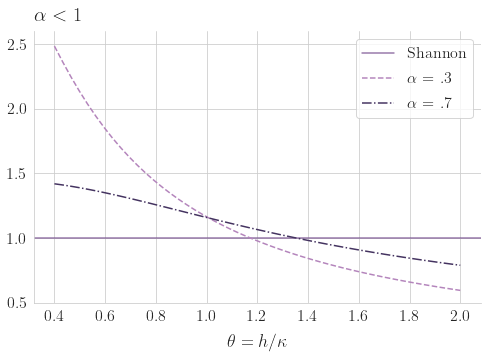

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.axhline(1, label="Shannon", color=colors[2], linestyle='-', alpha=.8)
ax.plot(diff_range, data[data[:, 0] == .3][:, 1], label=r"$\alpha$ = .3", color=colors[0], linestyle='--')
ax.plot(diff_range, data[data[:, 0] == .7][:, 1], label=r"$\alpha$ = .7", color=colors[4], linestyle='-.')
ax.legend(fontsize=16)
ax.set_xlabel(r'$\theta = h/\kappa$', labelpad=10)
ax.set_ylim(bottom=.5, top=2.6)
ax.yaxis.set_ticks(np.arange(.5, 2.6, 0.5))
ax.set_title(r'$\alpha < 1$',
             loc='left', pad=10, fontsize=20)

sns.despine()
# plt.savefig(os.path.join(fig_dir, 'elast_gl_ch_al1.pdf'), format='pdf', dpi=1200, bbox_inches='tight')
plt.show()

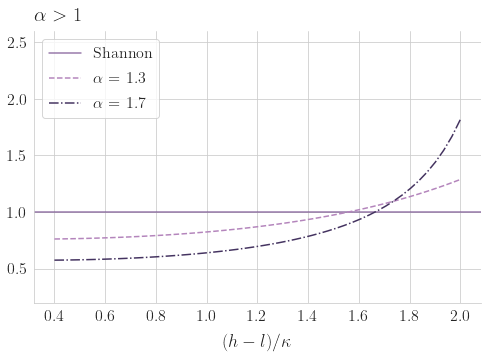

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.axhline(1, label="Shannon", color=colors[2], linestyle='-', alpha=.8)
ax.plot(diff_range, data[data[:, 0] == 1.3][:, 1], label=r"$\alpha$ = 1.3", color=colors[0], linestyle='--')
ax.plot(diff_range, data[data[:, 0] == 1.7][:, 1], label=r"$\alpha$ = 1.7", color=colors[4], linestyle='-.')

ax.legend(fontsize=16, loc=2)
ax.set_xlabel(r'$(h - l)/\kappa$', labelpad=10)
ax.set_ylim(bottom=.2, top=2.6)
ax.yaxis.set_ticks(np.arange(.5, 2.6, 0.5))
ax.set_title(r'$\alpha > 1$',
             loc='left', pad=10, fontsize=20)

sns.despine()
# plt.savefig(os.path.join(fig_dir, 'elast_gl_ch_ag1.pdf'), format='pdf', dpi=1200, bbox_inches='tight')
plt.show()

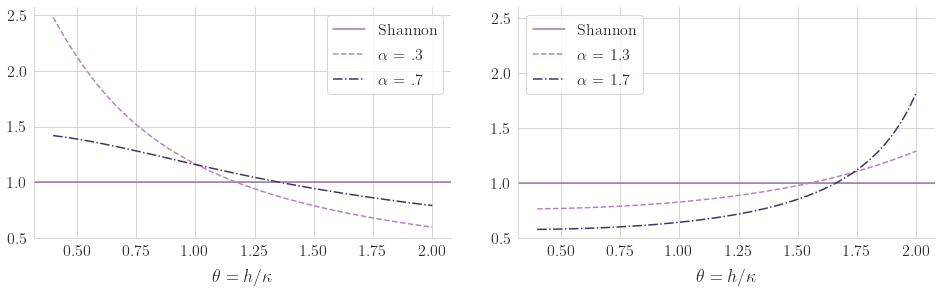

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].axhline(1, label="Shannon", color=colors[2], linestyle='-', alpha=.8)
ax[0].plot(diff_range, data[data[:, 0] == .3][:, 1], label=r"$\alpha$ = .3", color=colors[0], linestyle='--')
ax[0].plot(diff_range, data[data[:, 0] == .7][:, 1], label=r"$\alpha$ = .7", color=colors[4], linestyle='-.')
ax[0].legend(fontsize=16)
ax[0].set_xlabel(r'$\theta = h/\kappa$', labelpad=10)
ax[1].set_ylim(bottom=.5, top=2.6)
ax[0].yaxis.set_ticks(np.arange(.5, 2.6, 0.5))


ax[1].axhline(1, label="Shannon", color=colors[2], linestyle='-', alpha=.8)
ax[1].plot(diff_range, data[data[:, 0] == 1.3][:, 1], label=r"$\alpha$ = 1.3", color=colors[0], linestyle='--')
ax[1].plot(diff_range, data[data[:, 0] == 1.7][:, 1], label=r"$\alpha$ = 1.7", color=colors[4], linestyle='-.')
ax[1].legend(fontsize=16)
ax[1].set_xlabel(r'$\theta = h/\kappa$', labelpad=10)
ax[1].set_ylim(bottom=.5, top=2.6)
ax[1].yaxis.set_ticks(np.arange(.5, 2.6, 0.5))

sns.despine()
# plt.savefig(os.path.join(fig_dir, 'elast_gl_ch.pdf'), format='pdf', dpi=1200, bbox_inches='tight')
plt.tight_layout(pad=4)
plt.show()